In [790]:
import pandas as pd
import seaborn as sns
import joblib as jb
from sklearn.preprocessing import StandardScaler

In [791]:
data = pd.read_csv('../Data/Customers.csv', encoding='utf-8')

In [792]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [793]:
data.drop(columns="CustomerID", axis=1, inplace=True)

In [794]:
data.shape

(2000, 7)

In [795]:
data.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [796]:
data.describe(include='O')

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


In [797]:
data.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [798]:
data.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>,
        <Axes: title={'center': 'Work Experience'}>],
       [<Axes: title={'center': 'Family Size'}>, <Axes: >]], dtype=object)

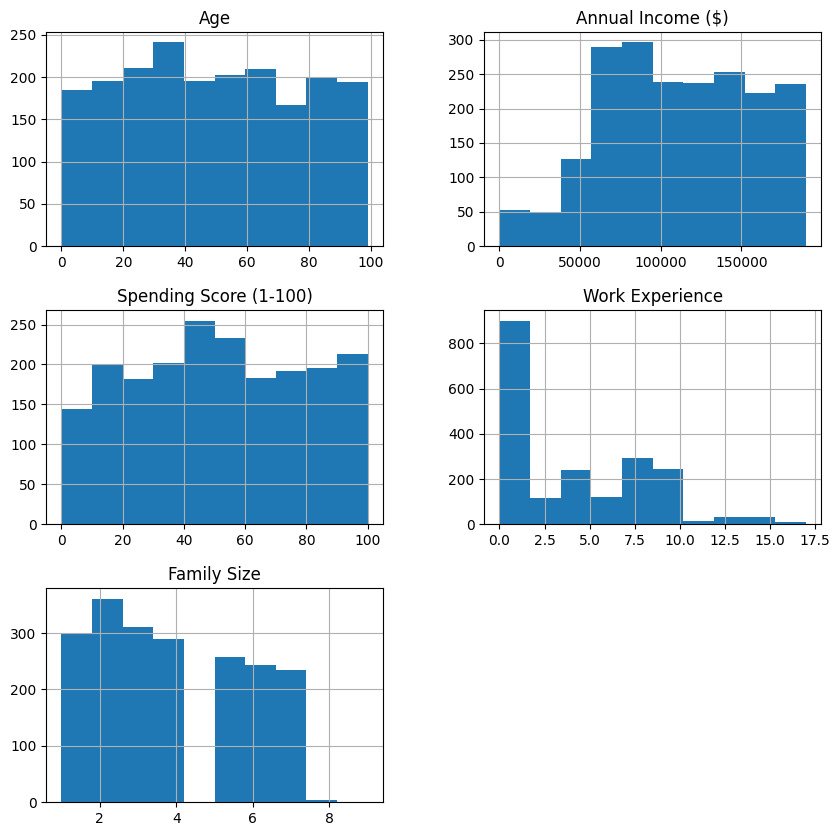

In [799]:
data.hist(figsize=(10, 10))


Age                          Axes(0.125,0.53;0.227941x0.35)
Annual Income ($)         Axes(0.398529,0.53;0.227941x0.35)
Spending Score (1-100)    Axes(0.672059,0.53;0.227941x0.35)
Work Experience              Axes(0.125,0.11;0.227941x0.35)
Family Size               Axes(0.398529,0.11;0.227941x0.35)
dtype: object

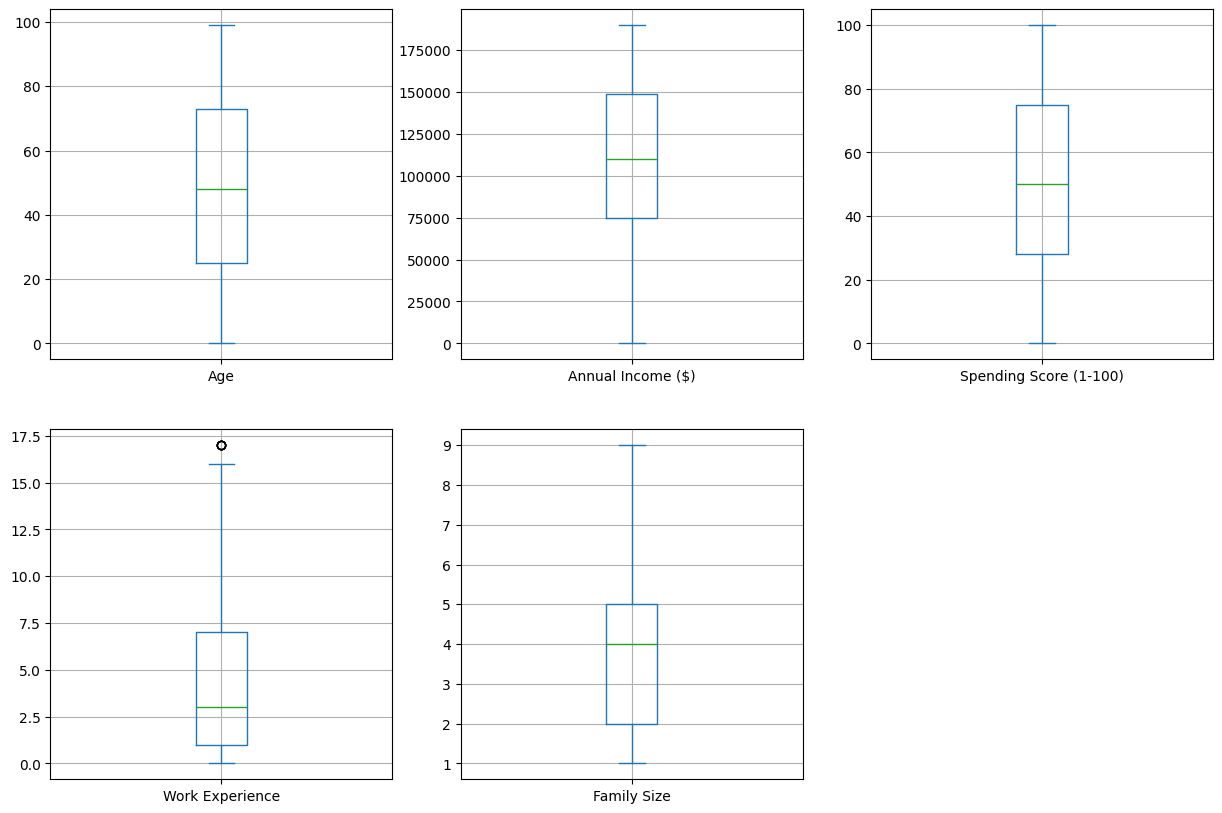

In [800]:
# print the box plot using matplotlib for each column
data[['Age','Annual Income ($)','Spending Score (1-100)','Work Experience','Family Size']].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), grid=True)

<Axes: xlabel='Work Experience'>

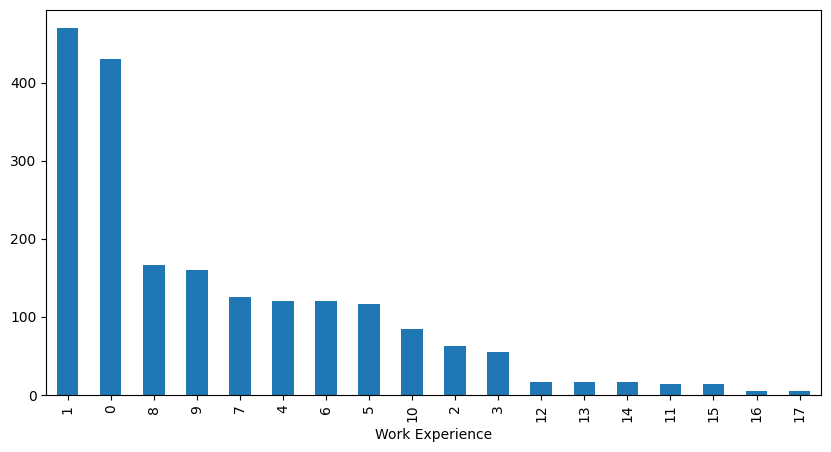

In [801]:
data['Work Experience'].value_counts().plot(kind='bar', figsize=(10, 5))

In [802]:
data['Work Experience'].skew()

np.float64(0.6837183173034943)

In [803]:
data['Work Experience'].quantile([0.25, 0.5, 0.75, 0.8, 0.90, 0.95, 0.98, 0.99]).to_frame()

,Work Experience
0.25,1.00
0.50,3.00
0.75,7.00
0.80,8.00
0.90,9.00
0.95,10.00
0.98,13.02
0.99,15.00


In [804]:
data['Work Experience'].value_counts().to_frame()

,count
Work Experience,
1,470
0,431
8,166
9,160
7,126
4,121
6,120
5,117
10,84


In [805]:
data['Work Experience'].value_counts(normalize=True,sort=True).to_frame().mul(100).round(2).astype(str) + '%'

,proportion
Work Experience,
1,23.5%
0,21.55%
8,8.3%
9,8.0%
7,6.3%
4,6.05%
6,6.0%
5,5.85%
10,4.2%


In [806]:
data = data[data["Work Experience"] <= 15]

<Axes: xlabel='Work Experience'>

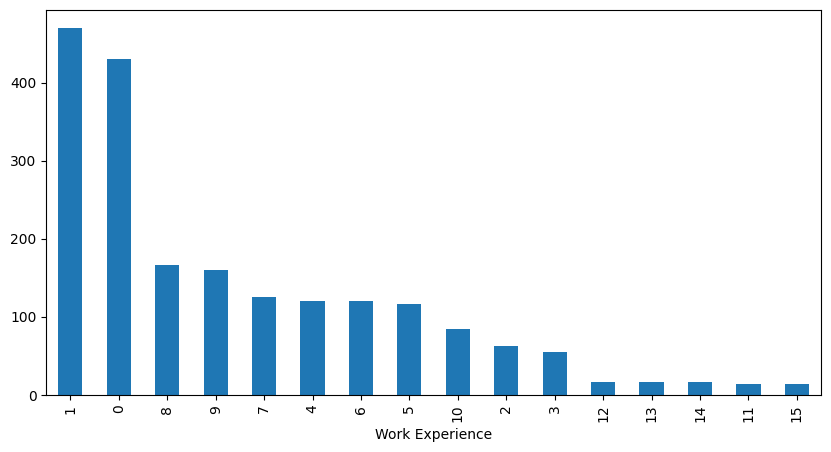

In [807]:
data['Work Experience'].value_counts().plot(kind='bar', figsize=(10, 5))

Work Experience    Axes(0.125,0.53;0.227941x0.35)
dtype: object

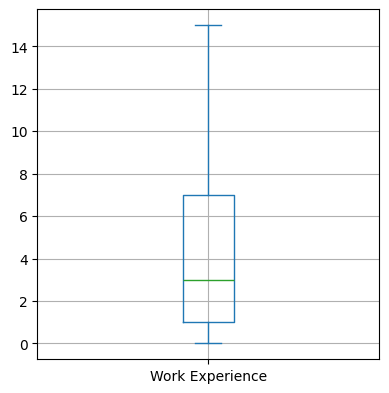

In [808]:
data["Work Experience"].plot(kind="box", subplots=True, layout=(2, 3), figsize=(15, 10), grid=True)

<Axes: ylabel='Frequency'>

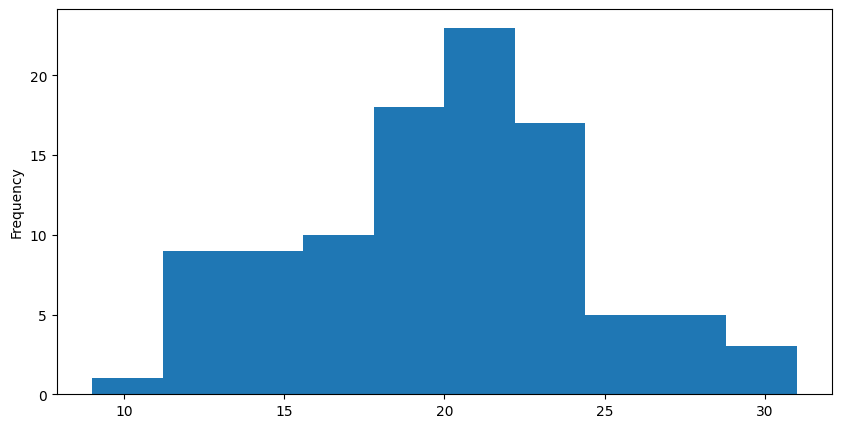

In [809]:
data['Age'].value_counts().plot(kind='hist', figsize=(10, 5))

In [810]:
data['Age'].value_counts(normalize=True,sort=True).to_frame().mul(100).round(2).astype(str) + '%'

,proportion
Age,
31,1.56%
52,1.51%
32,1.51%
54,1.41%
63,1.41%
...,...
77,0.6%
10,0.6%
61,0.6%


In [811]:
data['Age'].quantile([0.25, 0.5, 0.75, 0.8, 0.90, 0.95, 0.98, 0.99]).to_frame()

,Age
0.25,25.0
0.50,48.0
0.75,73.0
0.80,79.0
0.90,89.0
0.95,94.0
0.98,97.0
0.99,98.0


<Axes: xlabel='Work Experience', ylabel='Annual Income ($)'>

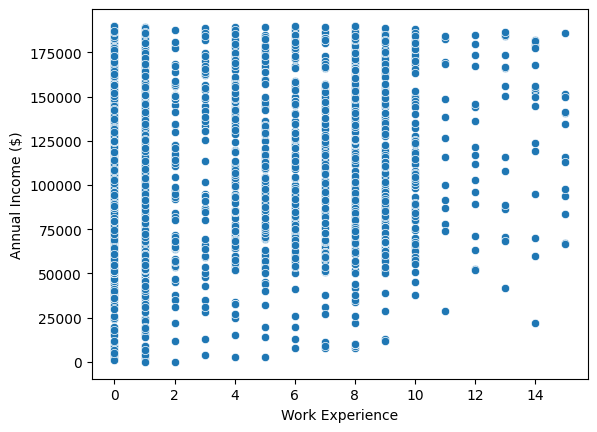

In [812]:
sns.scatterplot(data=data, x="Work Experience", y="Annual Income ($)")

<Axes: xlabel='Work Experience', ylabel='Spending Score (1-100)'>

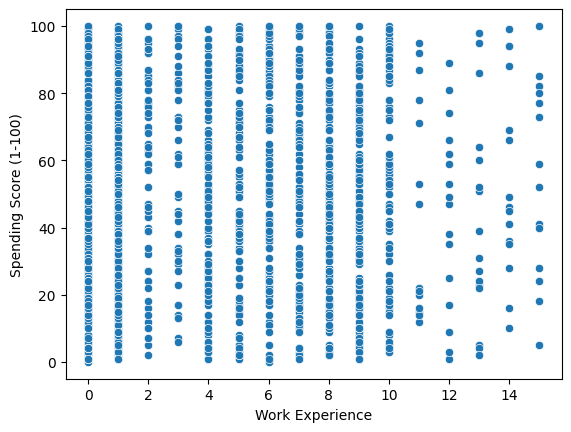

In [813]:
sns.scatterplot(
    data=data, x="Work Experience", y="Spending Score (1-100)"
)

<Axes: xlabel='Annual Income ($)', ylabel='Spending Score (1-100)'>

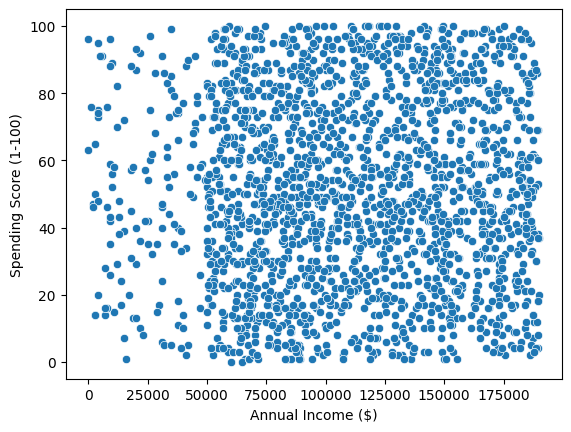

In [814]:
sns.scatterplot(
    data=data, x="Annual Income ($)", y="Spending Score (1-100)"
)

In [815]:
data.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3


In [816]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [817]:
data.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,Healthcare,1,4
1,1,21,35000,81,Engineer,3,3


In [818]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1990 non-null   int64 
 1   Age                     1990 non-null   int64 
 2   Annual Income ($)       1990 non-null   int64 
 3   Spending Score (1-100)  1990 non-null   int64 
 4   Profession              1955 non-null   object
 5   Work Experience         1990 non-null   int64 
 6   Family Size             1990 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 124.4+ KB


In [819]:
data.dropna(inplace=True)

In [820]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1955 non-null   int64 
 1   Age                     1955 non-null   int64 
 2   Annual Income ($)       1955 non-null   int64 
 3   Spending Score (1-100)  1955 non-null   int64 
 4   Profession              1955 non-null   object
 5   Work Experience         1955 non-null   int64 
 6   Family Size             1955 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 122.2+ KB


In [821]:
data['Profession'].nunique()

9

In [822]:
data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [823]:
data = pd.get_dummies(data, columns=['Profession'], drop_first=True)

In [824]:
data.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,False,False,False,False,True,False,False,False
1,1,21,35000,81,3,3,False,True,False,False,False,False,False,False


In [825]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    1955 non-null   int64
 1   Age                       1955 non-null   int64
 2   Annual Income ($)         1955 non-null   int64
 3   Spending Score (1-100)    1955 non-null   int64
 4   Work Experience           1955 non-null   int64
 5   Family Size               1955 non-null   int64
 6   Profession_Doctor         1955 non-null   bool 
 7   Profession_Engineer       1955 non-null   bool 
 8   Profession_Entertainment  1955 non-null   bool 
 9   Profession_Executive      1955 non-null   bool 
 10  Profession_Healthcare     1955 non-null   bool 
 11  Profession_Homemaker      1955 non-null   bool 
 12  Profession_Lawyer         1955 non-null   bool 
 13  Profession_Marketing      1955 non-null   bool 
dtypes: bool(8), int64(6)
memory usage: 122.2 KB


In [826]:
data['Annual Income'] = data['Annual Income ($)']
# rename the column
data.drop(columns='Annual Income ($)', inplace=True)

In [827]:
data['Annual Income'].describe().to_frame()

,Annual Income
count,1955.000000
mean,110625.893606
std,45896.823735
min,0.000000
25%,74280.500000
50%,109759.000000
75%,149170.000000
max,189974.000000


In [828]:
scaler = StandardScaler()

In [829]:
# scaler.fit(data[['Annual Income']])
# data['Annual Income'] = scaler.transform(data[['Annual Income']])

# jb.dump(scaler, '../Models/AnnualIncomeScaler.joblib')

In [830]:
data.head(2)

,Gender,Age,Spending Score (1-100),Work Experience,Family Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Annual Income
0,1,19,39,1,4,False,False,False,False,True,False,False,False,15000
1,1,21,81,3,3,False,True,False,False,False,False,False,False,35000


In [831]:
data = data[['Gender', 'Age', 'Annual Income', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing']]

In [832]:
data.head(2)

,Gender,Age,Annual Income,Spending Score (1-100),Work Experience,Family Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,False,False,False,False,True,False,False,False
1,1,21,35000,81,3,3,False,True,False,False,False,False,False,False


In [833]:
data.to_csv('../Data/CustomersCleaned.csv', index=False)